The difference in radius over 5 orbital periods is 11964422.925506592 meters
The percentage difference in radius is 0.00805630794256723 %
The difference in energy over 5 orbital periods is 5.188146770730811e+18 Joules
The percentage difference in energy is -1.9362040070940789e-13 %
Final position of body number 0 [   27620.22002913 13966069.01124224        0.        ] meters
Final velocity of body number 0 [0.03109314 0.00557902 0.        ] meters
Final position of body number 1 [1.39256995e+11 5.16499125e+10 0.00000000e+00] meters
Final velocity of body number 1 [-10416.46174334  28130.98249728      0.        ] meters


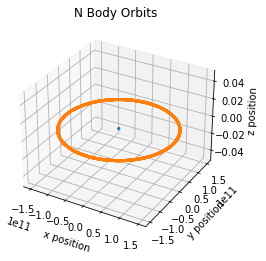

In [80]:
#Problem 1

#I tried to separate the stepper from the driver, but got confused and had to revert to my original code. Sorry! I'll make sure
#to look more into the problem set 4 solution over spring break to pinpoint what I'm missing.

from mpl_toolkits import mplot3d
import math as m
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sp


def dx_dt(velocity): #velocity ODE
    return velocity

def dv_dt(N, mass, position): #acceleration ODE
    
    acceleration = np.zeros([N,3], dtype = float) #Start by defining acceleration as an N x 3 matrix, where the columns
                                                #represent the x, y, and z coordinates and the rows represent the ith body.
    
    for i in range(0,N): #Then, do the inner for loop for all bodies.
        for j in range(0,N): #First, sum acceleration over all bodies except for the ith body and store it in the ith row.
            if j != i:
                acceleration[i] = acceleration[i] + (sp.G)*(mass[j])*(position[j]-position[i])/(np.linalg.norm(position[j]-position[i]))**3
            else:
                pass
            
    return(acceleration) #returns the final N x 3 matrix that describes the accelerations for all bodies at given positions
        
    

def RK4(N, h, stepnumber, position, velocity, mass):
    
    initial_energy = 0
    
    initial_radius = np.linalg.norm(position[1]-position[0]) #Before the for loop, define initial radius as length of the 
                                                            #difference vector between the positions of the two bodies
        
    for i in range(0,N): #Potential Energy
        for j in range(0,N):
            if j != i:
                initial_energy = initial_energy - (sp.G)*(mass[i]*mass[j])/(2*(np.linalg.norm(position[i]-position[j])))
            else:
                pass
            
    for i in range(0,N): #Kinetic Energy
        initial_energy = initial_energy + (1/2)*mass[i]*(np.linalg.norm(velocity[i]))**2
    
    position_array = position
    
    for i in range(0, stepnumber): #RK4 is implemented
        k1 = dv_dt(N, mass, position)
        l1 = dx_dt(velocity)
        k2 = dv_dt(N, mass, position + l1*h/2)
        l2 = dx_dt(velocity + k1*h/2)
        k3 = dv_dt(N, mass, position + l2*h/2)
        l3 = dx_dt(velocity + k2*h/2)
        k4 = dv_dt(N, mass, position + l3*h)
        l4 = dx_dt(velocity + k3*h)
        
        position = position + (1/6)*(l1 + 2*l2 + 2*l3 + l4)*h #The positions and velocities are updated after each time step.
        velocity = velocity + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h
        
        position_array = np.append(position_array, position)
        
    final_energy = 0
    
    for i in range(0,N): #Potential Energy
        for j in range(0,N):
            if i != j:
                final_energy = final_energy - (sp.G)*(mass[i]*mass[j])/(2*(np.linalg.norm(position[i]-position[j])))
            else:
                pass
            
    for j in range(0,N): #Kinetic Energy
        final_energy = final_energy + (1/2)*mass[j]*(np.linalg.norm(velocity[j]))**2
        
    print("The difference in radius over 5 orbital periods is", np.linalg.norm(position[1]-position[0]) - initial_radius, 'meters')
    print("The percentage difference in radius is", (((np.linalg.norm(position[1]-position[0])) - initial_radius)/(initial_radius))*100,'%')    
    print("The difference in energy over 5 orbital periods is", final_energy - initial_energy, "Joules")
    print("The percentage difference in energy is", ((final_energy - initial_energy)/(initial_energy))*100, '%')
                  
    for j in range(0,N):
        print("Final position of body number", j, np.array([position[j][0], position[j][1], position[j][2]]), 'meters')
        print("Final velocity of body number", j, np.array([velocity[j][0], velocity[j][1], velocity[j][2]]), 'meters')
            
        
    return(position_array)


position_array = RK4(2, 3600, 5*(24*365), np.array([[0,0,0],[148.51e9,0,0]]), np.array([[0,0,0],[0,30000,0]]), np.array([2e30, 5.97e24]))


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('z position') 
ax.set(title = 'N Body Orbits')
ax.plot3D(position_array[::6], position_array[1::6], position_array[2::6], linewidth = '3', label = 'Body 0 Orbit')
ax.plot3D(position_array[3::6], position_array[4::6], position_array[5::6], linewidth = '3', label = 'Body 1 Orbit')
plt.show()



The difference in energy over 100 orbital periods is (-1.393353046449644e+26, 'Joules')
The percentage difference in energy is 6.452795834229693e-08 %
Final position of body number 0 [-8.57287828e+08 -8.97386434e+10  0.00000000e+00] meters
Final velocity of body number 0 [  9.09967076 -32.92842913   0.        ] meters
Final position of body number 1 [ 1.55166117e+10 -2.36871582e+11  0.00000000e+00] meters
Final velocity of body number 1 [29618.79846189  4273.50767809     0.        ] meters
Final position of body number 2 [6.66161464e+11 3.12841875e+11 0.00000000e+00] meters
Final velocity of body number 2 [-9681.85761246  4798.37048339     0.        ] meters


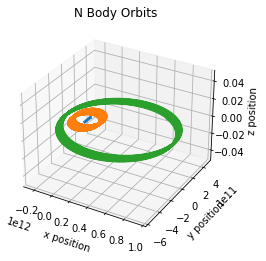

In [81]:
from mpl_toolkits import mplot3d
import math as m
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sp


def dx_dt(velocity): #velocity ODE
    return velocity

def dv_dt(N, mass, position): #acceleration ODE
    
    acceleration = np.zeros([N,3], dtype = float) #Start by defining acceleration as an N x 3 matrix, where the columns
                                                #represent the x, y, and z coordinates and the rows represent the ith body.
    
    for i in range(0,N): #Then, do the inner for loop for all bodies.
        for j in range(0,N): #First, sum acceleration over all bodies except for the ith body and store it in the ith row.
            if j != i:
                acceleration[i] = acceleration[i] + (sp.G)*(mass[j])*(position[j]-position[i])/(np.linalg.norm(position[j]-position[i]))**3
            else:
                pass
            
    return(acceleration) #returns the final N x 3 matrix that describes the accelerations for all bodies at given positions
        
    

def RK4(N, h, stepnumber, position, velocity, mass):
    
    initial_energy = 0
    
    for i in range(0,N): #Potential Energy
        for j in range(0,N):
            if j != i:
                initial_energy = initial_energy - (sp.G)*(mass[i]*mass[j])/(2*(np.linalg.norm(position[i]-position[j])))
            else:
                pass
            
    for i in range(0,N): #Kinetic Energy
        initial_energy = initial_energy + (1/2)*mass[i]*(np.linalg.norm(velocity[i]))**2
    
    position_array = position
    
    for i in range(0, stepnumber): #RK4 is implemented
        k1 = dv_dt(N, mass, position)
        l1 = dx_dt(velocity)
        k2 = dv_dt(N, mass, position + l1*h/2)
        l2 = dx_dt(velocity + k1*h/2)
        k3 = dv_dt(N, mass, position + l2*h/2)
        l3 = dx_dt(velocity + k2*h/2)
        k4 = dv_dt(N, mass, position + l3*h)
        l4 = dx_dt(velocity + k3*h)
        
        position = position + (1/6)*(l1 + 2*l2 + 2*l3 + l4)*h #The positions and velocities are updated after each time step.
        velocity = velocity + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h
        
        position_array = np.append(position_array, position)
        
            
    final_energy = 0
    
    for j in range(0,N): #Potential Energy
        for k in range(0,N):
            if k != j:
                final_energy = final_energy - (sp.G)*(mass[j]*mass[k])/(2*(np.linalg.norm(position[j]-position[k])))
            else:
                pass
            
    for j in range(0,N): #Kinetic Energy
        final_energy = final_energy + (1/2)*mass[j]*(np.linalg.norm(velocity[j]))**2
                
    print("The difference in energy over 100 orbital periods is", (final_energy - initial_energy, "Joules"))
    print("The percentage difference in energy is", ((final_energy - initial_energy)/(initial_energy))*100, '%')
                  
    for j in range(0,N):
        print("Final position of body number", j, np.array([position[j][0], position[j][1], position[j][2]]), 'meters')
        print("Final velocity of body number", j, np.array([velocity[j][0], velocity[j][1], velocity[j][2]]), 'meters')
    else:
        pass
            
        
    
        
    return(position_array)

r = (1-.6)*4*(148.51e9)
v_tan = np.sqrt((sp.G)*2e30*(1+.6)/(4*148.51e9*(1-.6)))

position_array = RK4(3, 3600*24, 365*100, np.array([[0,0,0],[148.51e9,0,0],[-r,0,0]]), np.array([[0,0,0],[0,30000,0],[0,-v_tan,0]]), np.array([2e30, 5.97e24, 1.898e27]))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('z position') 
ax.set(title = 'N Body Orbits')
ax.plot3D(position_array[::9], position_array[1::9], position_array[2::9], linewidth = '3', label = 'Body 0 Orbit')
ax.plot3D(position_array[3::9], position_array[4::9], position_array[5::9], linewidth = '3', label = 'Body 1 Orbit')
ax.plot3D(position_array[6::9], position_array[7::9], position_array[8::9], linewidth = '3', label = 'Body 2 Orbit')
plt.show()

#The graph shows that the orbits of the Earth-like and Jupiter-like planets have a precessional nature to them due to the
#elliptical orbit of the Jupiter mass planet. 
#The decrease in total energy suggest that the magnitude of the velocities of the planets has been decreasing
#and the average distances between the planets and the sun have been decreasing. I believe there may be something
#wrong with how I am calculating energy because in problem 1, the total energy increases. Unfortunately, I have
#been unable to identify where I am going wrong. 